In [60]:
import matplotlib.pyplot as plt
import geopandas
import cartopy.feature as cfeature
import zipfile
import urllib.request
from cartopy import crs as ccrs
from datetime import datetime, timedelta
from metpy.plots import USCOUNTIES
import matplotlib.patches as mpatches

In [61]:
# Map parameters
domain=[-81.87, -71.87, 40.5, 45.5]
plotCities=True
cities=[{'Name':'Watkins Glen', 'Lat':42.38, 'Lon':-76.87}, {'Name':'Binghamton', 'Lat':42.10, 'Lon':-75.92}, 
                {'Name':'Syracuse', 'Lat':43.04, 'Lon':-76.17}, {'Name':'Rochester', 'Lat':43.16, 'Lon':-77.61}, 
                {'Name':'Albany', 'Lat':42.65, 'Lon':-73.76}, {'Name':'Saranac Lake', 'Lat':44.33, 'Lon':-74.13}, 
                {'Name':'Watertown', 'Lat':43.97, 'Lon':-75.91}, {'Name':'Buffalo', 'Lat':42.89, 'Lon':-78.88},
                {'Name':'Toronto', 'Lat':43.65, 'Lon':-79.38}, {'Name':'Cleveland', 'Lat':41.50, 'Lon':-81.69},
                {'Name':'Scranton', 'Lat':41.41, 'Lon':-75.66}, {'Name':'Erie', 'Lat':42.12, 'Lon':-80.09}, 
                {'Name':'Springfield', 'Lat':42.08, 'Lon':-72.59}, {'Name':'Burlington', 'Lat':44.48, 'Lon':-73.21}, 
                {'Name':'State College', 'Lat':40.79, 'Lon':-77.86}]

dataDIR='/home/CarterHumphreys/bin/data/WPC/'

In [62]:
# Get data
for day in range(3):
    url=f'https://ftp.wpc.ncep.noaa.gov/shapefiles/noaa_chart/WPC_Day{day+1}_sigwx_latest.zip'
    urllib.request.urlretrieve(url, f'{dataDIR}/wpc_sig_wx_day{day+1}.zip')
    with zipfile.ZipFile(f'{dataDIR}/wpc_sig_wx_day{day+1}.zip', 'r') as zip_ref:
        zip_ref.extractall(f'{dataDIR}/wpc_sig_wx_day{day+1}/')

In [63]:
#for day in range(3):
day=0
# Load data
chart=geopandas.read_file(f'{dataDIR}/wpc_sig_wx_day{day+1}/WPC_Day{day+1}_sigwx_latest.shp')

chart

,ID,PRODUCT,VALID_DATE,SIG_WX_TYPE,geometry
0,1,Day 1 Significant Weather,06/04/20,Severe Thunderstorms,"POLYGON ((-91.07000 44.34000, -91.11000 44.360..."
1,2,Day 1 Significant Weather,06/04/20,Severe Thunderstorms,"POLYGON ((-102.19000 34.80000, -102.18000 34.8..."
2,3,Day 1 Significant Weather,06/04/20,Severe Thunderstorms,"POLYGON ((-77.69000 38.34000, -77.72000 38.340..."


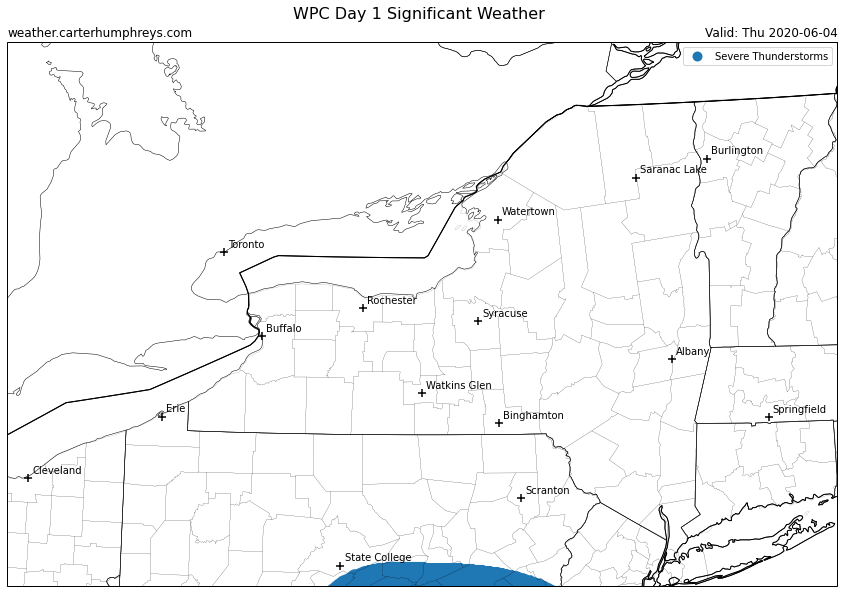

In [65]:

# Read meta data
validTime=chart['VALID_DATE'][0]
validTime=datetime.strptime(validTime, '%m/%d/%y')

# set up the figure
fig = plt.figure(figsize=(18, 10))

# Generate an Cartopy projection
crs=ccrs.PlateCarree()
proj = ccrs.Stereographic(central_longitude=(domain[1]-domain[0])/2+domain[0], central_latitude=(domain[3]-domain[2])/2+domain[2])
ax = fig.add_subplot(1, 1, 1, projection=proj)
ax.set_extent(domain, crs=crs)

# Setup colors
fill = {'Severe Thunderstorms':'red'}
stroke = {'Severe Thunderstorms':'darkred'}

# Plot outlook
chart.plot(ax=ax, column='SIG_WX_TYPE', legend=True, transform=ccrs.Geodetic())

# Add geographic features
country_borders=cfeature.NaturalEarthFeature(category='cultural', name='admin_0_countries', scale='10m', facecolor='none')
ax.add_feature(country_borders, edgecolor='black', linewidth=1.0)
state_borders=cfeature.NaturalEarthFeature(category='cultural', name='admin_1_states_provinces_lakes', scale='10m', facecolor='none')
ax.add_feature(state_borders, edgecolor='black', linewidth=0.5)
ax.add_feature(USCOUNTIES.with_scale('5m'), edgecolor='black', linewidth=0.1)

# Add Places
if plotCities:
    for city in cities:
        ax.scatter(city['Lon'], city['Lat'], marker='+', c='k', s=50, transform=ccrs.Geodetic())
        ax.text(city['Lon']+0.05, city['Lat']+0.05, city['Name'], transform=ccrs.Geodetic())

# Add Headers
plt.title(f'weather.carterhumphreys.com', loc='left')
plt.title(f'Valid: {validTime.strftime("%a %Y-%m-%d")}', loc='right')
plt.suptitle(f'WPC Day {day+1} Significant Weather', fontsize=16, x=0.51, y=0.93)

plt.show()